## 1. Definição do Problema

![Image of Yaktocat](https://radaramazonico.com.br/wp-content/uploads/2019/08/amazonia-queimadas.jpg)

Um dos assuntos mais falados nos noticiários neste ano de 2019 foi a respeito das queimadas que atingiram a Amazônia. Por exemplo, só no mês de agosto deste ano, a quantidade de queimadas aumentou 3 vezes se comparado com o mesmo mês em anos anteriores. Como consequências deste aumento, estão a destruição de fauna e flora, destruição da camada de ozônio, aquecimento global, emissão de gases poluentes na atmosfera, dentro outras.

### Objetivo
Dito isto, espera-se identificar através desta análise quais estados do Brasil apresentam um maior número de queimadas, em quais períodos do ano e também quais fatores podem estar contribuindo para estes números. Além disso, será mostrado um provável comportamento no número de queimadas nos anos seguintes. 

## 2. Obtenção dos Dados

Os dados foram disponibilizados pelo [Kaggle](https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil/data). Este dataset foi montado a partir de coletas de dados realizados entre os anos de 1998 e 2017. O dataset é composto features como ano, estado, mês, número de focos de queimada e a data do ocorrido.

Abaixo é possível ver as cinco primeiras entradas do dataset.

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style()

In [2]:
forest_fires = pd.read_csv('amazon.csv', encoding = 'ISO-8859-1')
forest_fires.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


**Q1. Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?**

In [3]:
print("Variáveis:\t{}\nEntradas:\t{}".format(forest_fires.shape[1], forest_fires.shape[0]))

Variáveis:	5
Entradas:	6454


## 3. Exploração dos Dados

Para uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, etc.

### Dicionário de Dados

* **year:** Ano em que ocorram os incêndios florestais
* **state:** Estados brasileiros
* **month:** Meses em que ocorreram os incêndios florestais
* **number:** Número de incêndios florestais relatados
* **date:** Data de quando os incêndios florestais foram relatados

**Q1. Quais os tipos de cada variável?**

* Variáveis Numéricas
    * Discretas
        * year
    * Contínuas
        * number
* Variáveis Categóricas
    * state
    * month
    * date

In [4]:
# identificar o tipo de cada variável
display(forest_fires.dtypes)

year        int64
state      object
month      object
number    float64
date       object
dtype: object

**Q2. Qual a porcentagem de valores faltantes?**

Como podemos ver, o dataset não possui valores faltantes, o que nos economizará tempo, já que não será necessário nenhum tipo de análise extra para excluir  essas entradas faltantes, ou para preencher estes campos através de alguma  abordagem (por exemplo com a média dos valores desta coluna).

In [5]:
# ver a porcentagem de valores faltantes
(forest_fires.isnull().sum() / forest_fires.shape[0]).sort_values(ascending=False)

date      0.0
number    0.0
month     0.0
state     0.0
year      0.0
dtype: float64

**Q3. Qual é a distribuição estatística dos dados?**

In [6]:
forest_fires.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


**Q4. Quais os meses com maior quantidade de incêncios?**

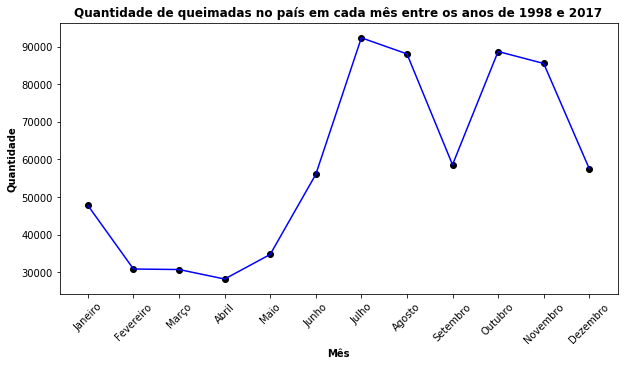

In [7]:
# Trecho para pegar os meses na ordem correta: Janeiro ... Dezembro
meses = forest_fires['month'].unique()
month_number = forest_fires[['month','number']].groupby(['month']).sum()

month_number = month_number.loc[meses, ['number']]

x = list(month_number.index)
y = month_number['number'].values

plt.figure(figsize=(10,5))
plt.plot(x, y, color='blue')
plt.scatter(x, y, color='black')
plt.xticks(rotation=45)
plt.title('Quantidade de queimadas no país em cada mês entre os anos de 1998 e 2017', fontweight='bold')
plt.xlabel('Mês', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.show()

**Q5. Como se deu a quantidade de incêndios do longo dos anos?**

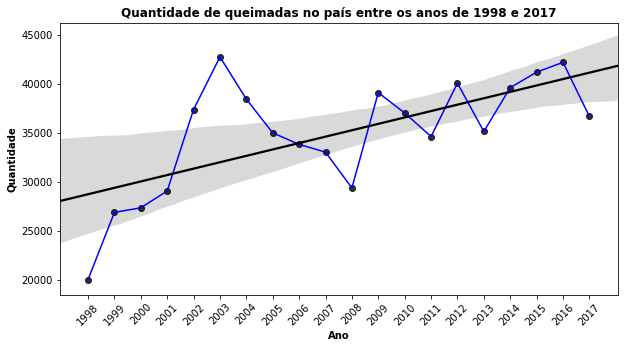

In [8]:
year_count = forest_fires[['year', 'number']].groupby(['year']).sum()

x = forest_fires['year'].unique()
y = year_count['number'].values

plt.figure(figsize=(10,5))
plt.plot(x, y, color='blue', alpha=1)
sns.regplot(x=x, y=y, data=year_count, color='black')
plt.xticks(x, rotation=45)
plt.title('Quantidade de queimadas no país entre os anos de 1998 e 2017', fontweight='bold')
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.show()

**Q6. Em quais estados houve uma maior quantidade de queimadas entre os anos de 1998 e 2017?**

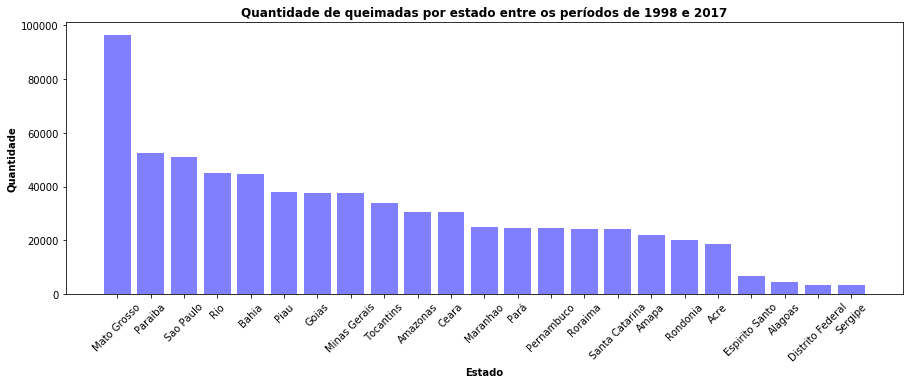

In [9]:
state_number = forest_fires[['state', 'number']].groupby(['state']).sum()
state_number = state_number.sort_values('number',ascending=False)

x = state_number.index
y = state_number['number'].values


plt.figure(figsize=(15,5))
plt.bar(x, y, align='center', alpha=0.5, color='blue')
plt.xticks(rotation=45)
plt.title('Quantidade de queimadas por estado entre os períodos de 1998 e 2017', fontweight='bold')
plt.xlabel('Estado', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.show()

Através de uma análise nos gráficos apresentados acima, é possível notar que existe uma tendência de que com o passar dos anos o número de queimadas continue crescendo. Além disso, nota-se que o estado com o maior número de queimadas é o estado do Mato Grosso, que possui uma quantidade de queimadas que é quase o dobro do número de queimadas no estado da Paraíba, que ocupa a segunda colocação. 

### Estado de São Paulo

Porém, o que faz com que os meses do meio do ano tenham um maior número de queimadas se comparado com os outros meses? Por que será que o volume de chuva é maior em um determinado mês do ano? Será que a temperatura está influenciando nesse resultado? A umidade do ar pode ser um fator que está contribuindo para isto?

Para responder estas e outras perguntar será feito um estudo à parte em cima do estado de São Paulo. Para isto, foi utilizado como referência o site https://pt.weatherspark.com/, que possui diversos dados meteorológicos referentes à várias cidades.

**Q7. Qual a quantidade de queimadas dentro de cada mês entre os anos de 2015 e 2017 no estado de São Paulo?**

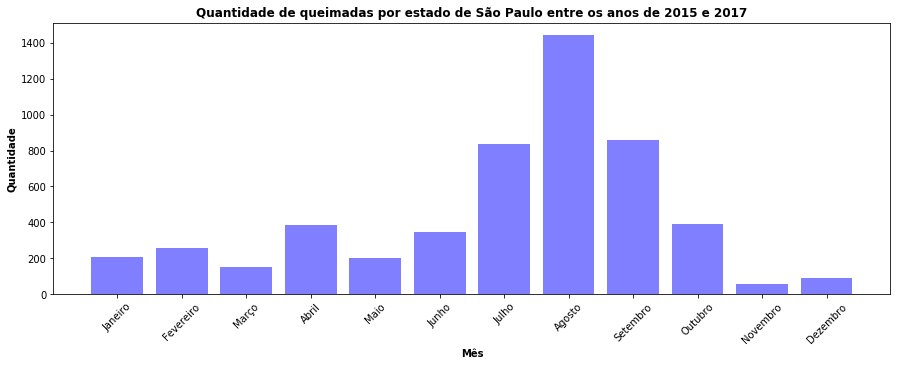

In [10]:
queimadas_SP = forest_fires['state'] == 'Sao Paulo'
queimadas_2015 = forest_fires['year'].isin(list(range(2015,2017)))

queimadas_SP = forest_fires[queimadas_SP & (queimadas_2015)]

meses = queimadas_SP['month'].unique()

queimadas_SP = queimadas_SP[['month', 'number']].groupby(['month']).sum()
queimadas_SP = queimadas_SP.loc[meses, ['number']]

x = queimadas_SP.index
y = queimadas_SP['number'].values

plt.figure(figsize=(15,5))
plt.bar(x,y, align='center', alpha=0.5, color='blue')
plt.xticks(rotation = 45)
plt.title('Quantidade de queimadas por estado de São Paulo entre os anos de 2015 e 2017', fontweight='bold')
plt.xlabel('Mês', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.show()

Como é possível ver no gráfico acima, entre os anos de 2015 e 2017, o estado de São Paulo apresentou em torno de 1400 queimadas só no mês de agosto. Mas por que agosto e não o mês de abril, por exemplo? Para verificar isto, analisaremos os gráficos abaixo (referência: https://pt.weatherspark.com/y/29939/Clima-caracter%C3%ADstico-em-Bauru-Brasil-durante-o-ano). 

Só para destacar, os dados apresentados a seguir são referentes à cidade de Bauru no estado de São Paulo. Esta cidade foi escolhida por se localizar mais no centro do estado de São Paulo. Todos os dados utilizados pelo site linkado anteriormente, foram coletados no período de 1 de janeiro de 1980 a 31 de dezembro de 2016.

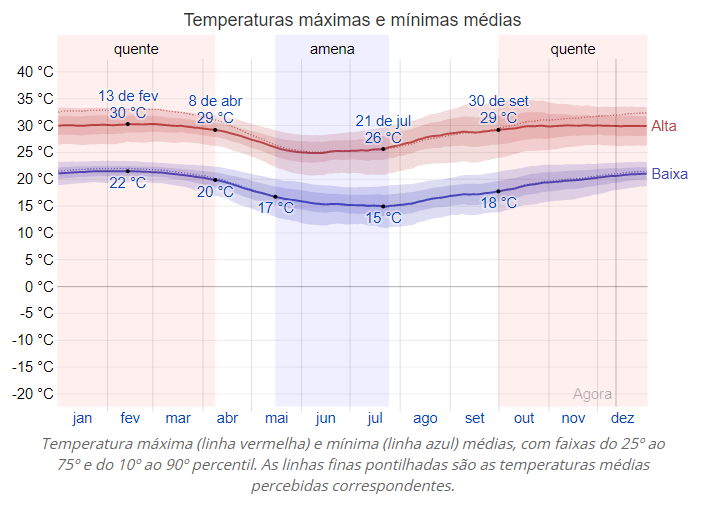

Analisando o gráfico acima, é possível notar que a temperatura média não varia muito ao longo do ano. Disto, conclui-se que a temperatura do ambiente não é um dos fatores com grande influência para este considerável número de queimadas entre os meses de julho e setembro.

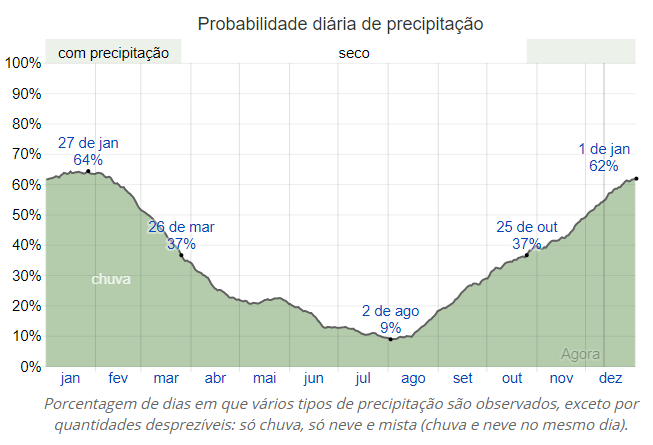

Pelo gráfico acima, é possível ver que os meses de julho e agosto são os meses do ano com a menor probabilidade de precipitação, o que contribuiu bastante para o alastramento dos focos de incêndios.

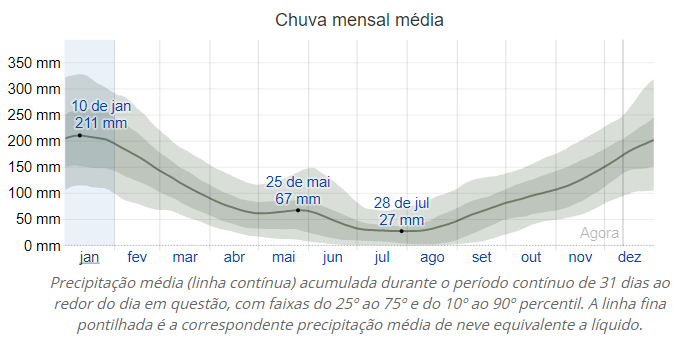

Consequência direta do gráfico 'Probabilidade diária de precipitação', o gráfico acima mostra que os meses de julho e agosto são os meses com um menor volume de chuva médio muito menor (27 mm), se comparado com o mês de janeiro (211 mm). Este fator contribuiu para um maior número de queimadas neste período pois, caso chovesse, haveria uma resistência muito maior ao alastramento das chamas.

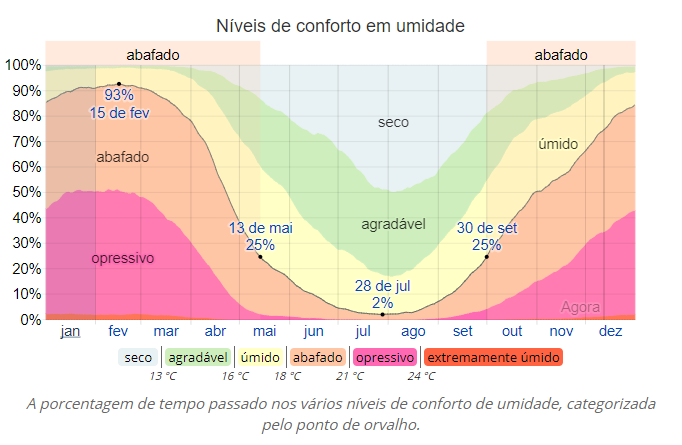

Outro fator bastante importante a ser analisado é a umidade do ar. Do gráfico acima, nota-se que o mês de agosto é o mês mais seco do ano nesta região, e isto faz com que os focos de incêndios se alastrem mais rapidamente.

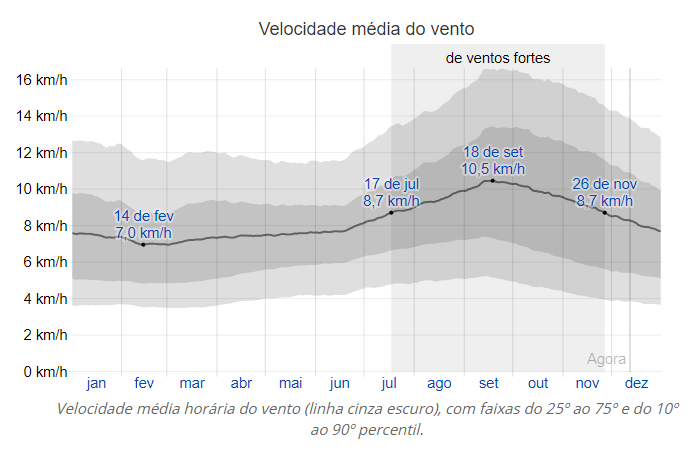

Um último fator mostrado aqui (existem vários outros) é a velocidade média dos ventos. Assim como no caso da umidade, a velocidade dos ventos tem um fator muito importante que também faz com que as queimadas se alastrem de forma muito mais rápida.

## 4. Conclusão

Através destes dados coletados entre o período de 1998 e 2017 foi possível ver através de análises gráficas que um aumento considerável no número de queimadas vem acontecendo, e que, o estado de Mato Grosso é o que mais tem sido atingido. 

Além disso, através de uma análise à parte foi possível ver que diversos fatores (além da interferência humana) contribuem para este alto número de queimadas que vem acontecendo, como: umidade do ar, velocidade dos ventos, probabilidade de chuva diária e chuva média mensal.

De um modo geral, os meses de julho a novembro merecem uma maior atenção no combate aos incêndios florestais devido ao grande número de queimadas que houve neste período se comparado com os outros meses.